In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/s(s+1)
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#d) Dizajnirati diferencijalni kopmenzator koji obezbedjuje brzinsku konstantu > 10, i faznu marginu >45 stepeni
#e) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#f) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [3]:
W=signal.lti([], [0, -1], 1)

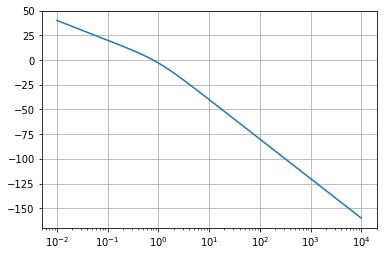

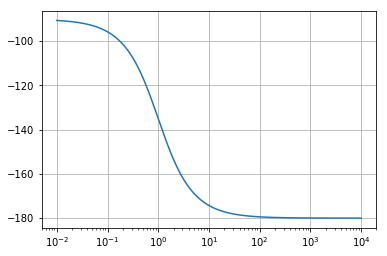

In [4]:
# a)
w_log=np.logspace(-2,4,num=1000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [5]:
# b) brzinska konstanta
Kv=1

In [6]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))

Presecna ucestanost pojacanja: 0.78


In [7]:
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: 52.06


In [8]:
# presecna ucestanost faze je beskonacna 
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))

Presecna ucestanost faze: 10000.0


In [9]:
# amplitudska margina je beskonacna
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))

Amplitudska margina: 100000000.5


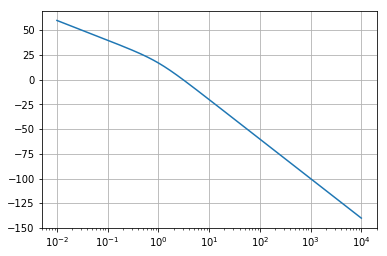

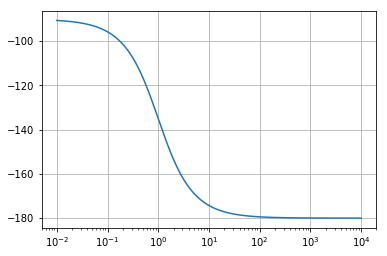

In [10]:
#d) prvo biramo pojacanje K=10 i crtamo Bodeov dijagram
W1=signal.lti([], [0, -1], 10)
w, mag, phase = signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [11]:
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))

Presecna ucestanost pojacanja: 3.07


In [12]:
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: 18.07


In [13]:
#Potrebno je povecati je za 27 stepeni
# Biramo otprilike 1/alpha=5  (obezbedjuje maksimalno fazno prednjacanje od 45)
# Biramo nulu tako da postize maksimalnu fazu oko NOVE presecne ucestanosti - isprobavanjem
# Prvo probamo a=1, b=5, znaci D(s)=10(s+1)/(s/5+1)=50(s+1)/(s+5)

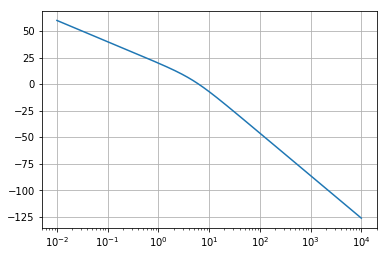

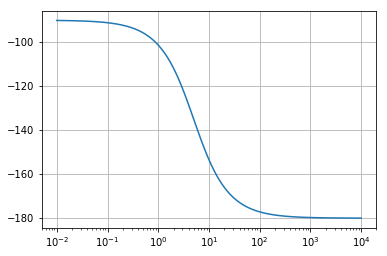

Presecna ucestanost pojacanja: 6.21
Fazna margina: 38.86


In [14]:
W2=signal.lti([-1], [0, -1, -5], 50)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

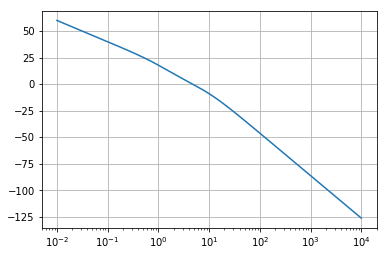

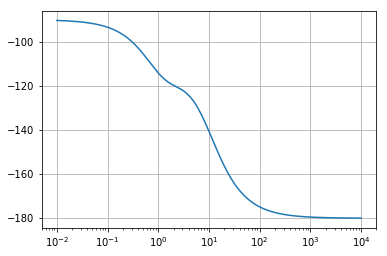

Presecna ucestanost pojacanja: 4.77
Fazna margina: 53.59


In [15]:
# Fazna margina ne zadovoljava - previse je pomerena presecna ucestanost pojacanja, 
# biramo vecu nulu a=2, znaci b=10: D(s)=10(s/2+1)/(s/10+1)=50(s+2)/(s+10)
W2=signal.lti([-2], [0, -1, -10], 50)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

In [16]:
#e) Ispunjeni su kriterijumi za gore izabran kompenzator

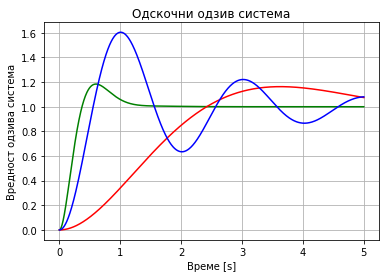

In [17]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=50(s+2)/s(s+1)(s+10)

brojilac=[50, 100]
imenilac1=sp.convolve(sp.convolve([1,0],[1,1]),[1,10])
imenilac=imenilac1+[0, 0, 50, 100]
W3=signal.lti(brojilac,imenilac)

W4=signal.lti([1],[1, 1, 1])

# Da smo primenili samo pojacanje K=10:
W5=signal.lti([10],[1, 1, 10])

t=np.linspace(0,5,1000)

tt,y1=W3.step(T=t)
tt,y2=W4.step(T=t)
tt,y3=W5.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r',tt,y3,'b')
plt.title("Одскочни одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

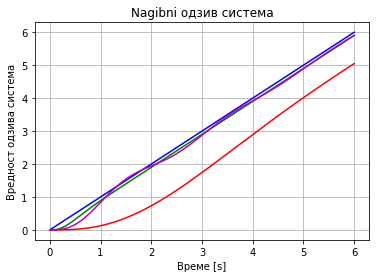

In [18]:
# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,6,1000)
tt,y1,x1=signal.lsim(W3,t,t)
tt,y2,x2=signal.lsim(W4,t,t)
tt,y3,x3=signal.lsim(W5,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r',tt,y3,'m')
plt.title("Nagibni одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

In [ ]:
#Zadatak 2:  Ponoviti prethodni zadatak za W(s)=50000/s(s+10)(s+50) 
#            i specifikacije: fazna margina>50 stepeni, propusni opseg > 20 rad/s

In [ ]:
#Zadatak 3:  Ponoviti prethodni zadatak za W(s)=5/s(s+1)(s/5+1) 
#             i specifikacije: fazna margina>40 stepeni, presecna ucestanost pojacanja priblizno = 2.5 rad/s

In [ ]:
#Zadatak 4:  Ponoviti prethodni zadatak za W(s)=1/(s/0.5+1)(s+1)(s/2+1) 
#             i specifikacije: fazna margina>25 stepeni, konstanta pojacanja K_p=9

In [ ]:
#Zadatak 5:  Ponoviti prethodni zadatak za W(s)=5(s+1)/s(s^2+5s+16)
#             i specifikacije: fazna margina>40 stepeni, presecna ucestanost pojacanja 10 rad/s < omega_1 <15 rad/s